In [20]:
import pandas as pd

In [21]:
df = pd.read_excel('CovidDeaths.xlsx')

In [22]:
df.head

<bound method NDFrame.head of       iso_code continent     location       date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan 2020-02-24          1.0        1.0   
1          AFG      Asia  Afghanistan 2020-02-25          1.0        0.0   
2          AFG      Asia  Afghanistan 2020-02-26          1.0        0.0   
3          AFG      Asia  Afghanistan 2020-02-27          1.0        0.0   
4          AFG      Asia  Afghanistan 2020-02-28          1.0        0.0   
...        ...       ...          ...        ...          ...        ...   
85166      ZWE    Africa     Zimbabwe 2021-04-26      38102.0       16.0   
85167      ZWE    Africa     Zimbabwe 2021-04-27      38164.0       62.0   
85168      ZWE    Africa     Zimbabwe 2021-04-28      38191.0       27.0   
85169      ZWE    Africa     Zimbabwe 2021-04-29      38235.0       44.0   
85170      ZWE    Africa     Zimbabwe 2021-04-30      38257.0       22.0   

       new_cases_smoothed  total_deaths  new_deaths  new_

In [23]:
df.describe

<bound method NDFrame.describe of       iso_code continent     location       date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan 2020-02-24          1.0        1.0   
1          AFG      Asia  Afghanistan 2020-02-25          1.0        0.0   
2          AFG      Asia  Afghanistan 2020-02-26          1.0        0.0   
3          AFG      Asia  Afghanistan 2020-02-27          1.0        0.0   
4          AFG      Asia  Afghanistan 2020-02-28          1.0        0.0   
...        ...       ...          ...        ...          ...        ...   
85166      ZWE    Africa     Zimbabwe 2021-04-26      38102.0       16.0   
85167      ZWE    Africa     Zimbabwe 2021-04-27      38164.0       62.0   
85168      ZWE    Africa     Zimbabwe 2021-04-28      38191.0       27.0   
85169      ZWE    Africa     Zimbabwe 2021-04-29      38235.0       44.0   
85170      ZWE    Africa     Zimbabwe 2021-04-30      38257.0       22.0   

       new_cases_smoothed  total_deaths  new_deaths  

In [24]:
print(df['location'].unique())

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union' 'Faeroe Islands' 'Falkland Islands'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 'Guatemala' 'Guernsey'
 'Guinea' 'Guinea-Bissau' '

In [25]:
# 'date' sütununu datetime formatına çeviriyoruz
df['date'] = pd.to_datetime(df['date'])

# Kontrol edelim (dtype: datetime64[ns] görmeliyiz)
df.info()

df['date'].head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               85171 non-null  object        
 1   continent                              81060 non-null  object        
 2   location                               85171 non-null  object        
 3   date                                   85171 non-null  datetime64[ns]
 4   total_cases                            83072 non-null  float64       
 5   new_cases                              83070 non-null  float64       
 6   new_cases_smoothed                     82069 non-null  float64       
 7   total_deaths                           73408 non-null  float64       
 8   new_deaths                             73566 non-null  float64       
 9   new_deaths_smoothed                    82069 non-null  float6

0   2020-02-24
1   2020-02-25
2   2020-02-26
3   2020-02-27
4   2020-02-28
5   2020-02-29
6   2020-03-01
7   2020-03-02
8   2020-03-03
9   2020-03-04
Name: date, dtype: datetime64[ns]

In [26]:
# locations verisi olarak sadece ülkeleri görmek istiyoruz. bu yüzden continent bilgisi olmayan satırları siliyoruz.
df = df[df['continent'].notnull()]

In [27]:
# Listemizi senin eklemelerinle güncelliyoruz
genisletilmis_sutunlar = [
    'location', 'date',
    'total_cases', 'new_cases',
    'total_deaths', 'new_deaths',
    'total_vaccinations', 'people_fully_vaccinated',
    'population', 'median_age', 'gdp_per_capita',
    'hospital_beds_per_thousand', 'life_expectancy',
    'extreme_poverty',
    'cardiovasc_death_rate',
    'diabetes_prevalence',
    'female_smokers',
    'male_smokers',
    'handwashing_facilities'
]

# Ana veriden sadece bu sütunları seçiyoruz
df = df[genisletilmis_sutunlar].copy()

# Seçimin doğru yapıldığını görmek için sütun isimlerine bakalım
print(df.columns.tolist())

['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'people_fully_vaccinated', 'population', 'median_age', 'gdp_per_capita', 'hospital_beds_per_thousand', 'life_expectancy', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities']


In [28]:
# Eksik verileri ve yüzdelerini hesaplayıp tablo yapalım
bos_veri_tablosu = pd.DataFrame({
    'Eksik Sayısı': df.isnull().sum(),
    'Eksik Yüzdesi (%)': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values(by='Eksik Yüzdesi (%)', ascending=False)

bos_veri_tablosu

,Eksik Sayısı,Eksik Yüzdesi (%)
people_fully_vaccinated,75479,93.11
total_vaccinations,72658,89.63
handwashing_facilities,42518,52.45
extreme_poverty,29076,35.87
male_smokers,21594,26.64
female_smokers,20697,25.53
new_deaths,11592,14.30
total_deaths,11591,14.30
hospital_beds_per_thousand,10678,13.17
median_age,4819,5.94


In [29]:
# 1. Aşı verilerindeki boşlukları 0 yapıyoruz (Çünkü o tarihte aşı yoktu)
df['total_vaccinations'] = df['total_vaccinations'].fillna(0)
df['people_fully_vaccinated'] = df['people_fully_vaccinated'].fillna(0)

# 2. Günlük vaka ve ölümlerdeki boşlukları 0 yapıyoruz (Rapor yoksa 0 varsayılır)
df['new_cases'] = df['new_cases'].fillna(0)
df['new_deaths'] = df['new_deaths'].fillna(0)

# 3. Kümülatif (Toplam) verilerdeki mantık hatasını önleme
# 'total_cases' boşsa 0 yapmak yerine, bir önceki günün sayısını almalıyız (ffill)
# Ancak bunu her ülke için ayrı ayrı yapmalıyız ki ülkeler karışmasın.
# (Not: Hala baştaki satırlar boş kalabilir, onları en son 0 yaparız)
cols_cumulative = ['total_cases', 'total_deaths']

for col in cols_cumulative:
    # Önce ileriye doğru doldur (dünkü veriyi bugüne taşı)
    df[col] = df.groupby('location')[col].ffill()
    # Eğer hala boşsa (serinin en başıysa) 0 yap
    df[col] = df[col].fillna(0)

# --- KONTROL ---
# Şimdi kritik sütunlarda eksik kaldı mı bakalım (sabit ülke verileri hariç)
kritik_sutunlar = ['total_cases', 'total_deaths', 'total_vaccinations', 'new_cases']
print(df[kritik_sutunlar].isnull().sum())

total_cases           0
total_deaths          0
total_vaccinations    0
new_cases             0
dtype: int64


In [30]:
# Milyon başına vaka ve ölüm sayılarını hesaplayalım
df['cases_per_million'] = (df['total_cases'] / df['population']) * 1_000_000
df['deaths_per_million'] = (df['total_deaths'] / df['population']) * 1_000_000

# Aşılanma yüzdesi (Nüfusun ne kadarı aşılandı?)
df['vaccination_rate'] = (df['people_fully_vaccinated'] / df['population']) * 100

print("Yeni sütunlar eklendi: cases_per_million, deaths_per_million, vaccination_rate")

Yeni sütunlar eklendi: cases_per_million, deaths_per_million, vaccination_rate


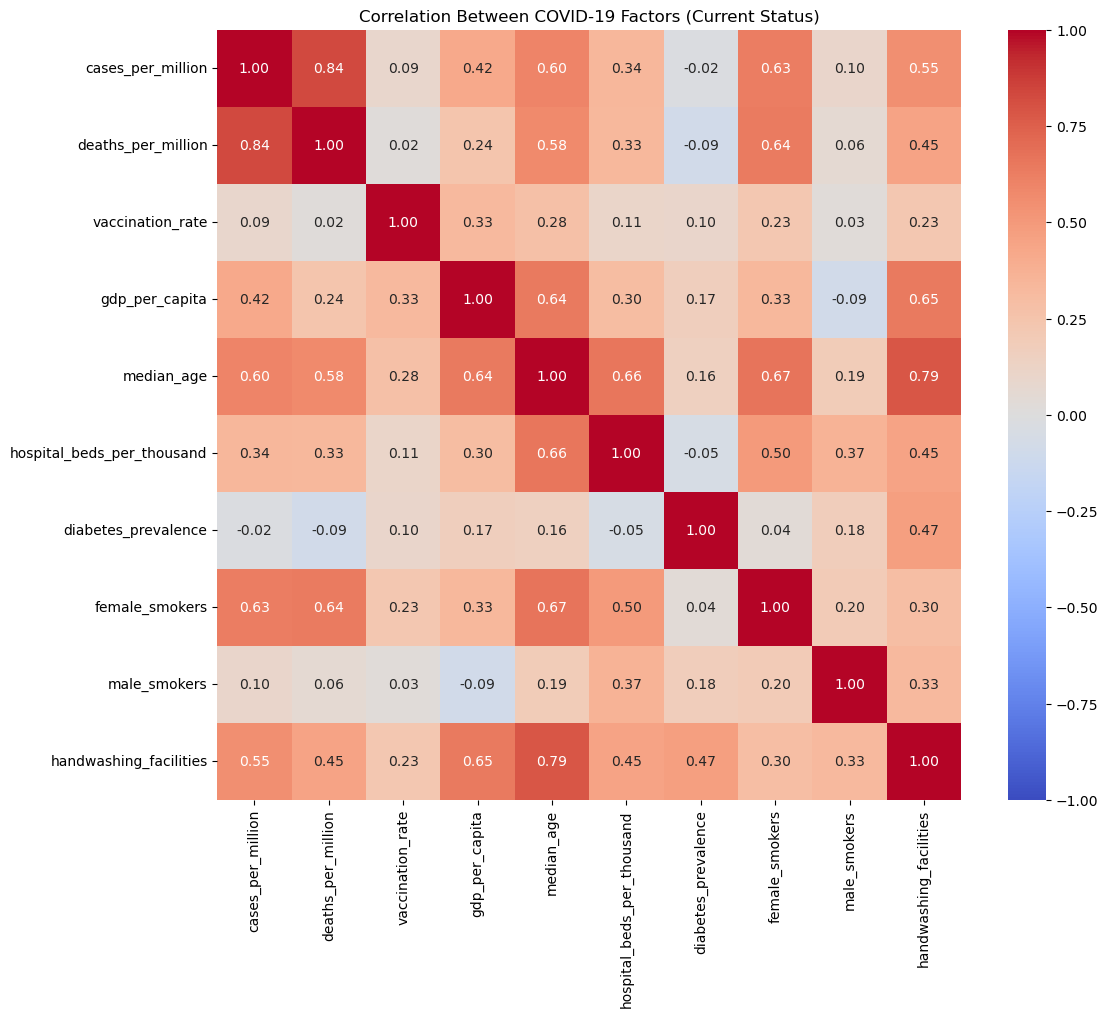

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Her ülkenin en son tarihli verisini alıyoruz (Snapshot)
df_latest = df.sort_values('date').groupby('location').tail(1)

# 2. Korelasyona sokacağımız sütunları seçelim
corr_columns = [
    'cases_per_million', 'deaths_per_million', 'vaccination_rate',
    'gdp_per_capita', 'median_age', 'hospital_beds_per_thousand',
    'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities'
]

# 3. Korelasyon Matrisini Hesapla
corr_matrix = df_latest[corr_columns].corr()

# 4. Grafiği Çiz
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between COVID-19 Factors (Current Status)')
plt.show()

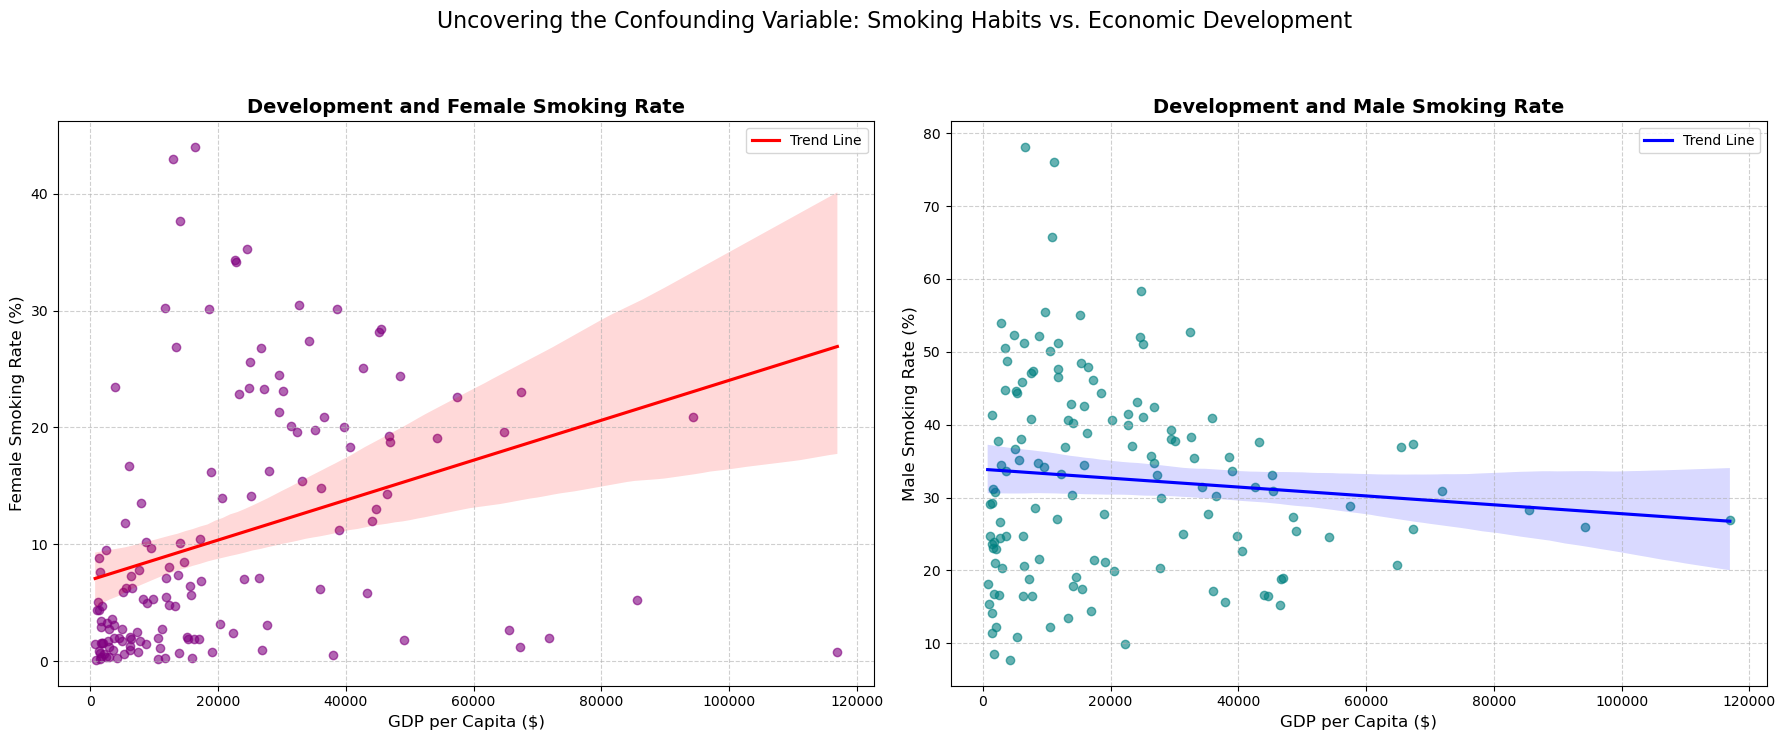

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the chart frame (2 subplots side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Chart 1: FEMALE Smoking Rate vs. GDP ---
# sns.regplot plots scatter points and the trend line
sns.regplot(
    ax=axes[0], # Plot on the left side
    x='gdp_per_capita', y='female_smokers', data=df_latest,
    scatter_kws={'alpha': 0.6, 'color': 'purple', 'label': 'Countries'}, # Point style
    line_kws={'color': 'red', 'label': 'Trend Line'} # Line style
)
axes[0].set_title('Development and Female Smoking Rate', fontsize=14, fontweight='bold')
axes[0].set_xlabel('GDP per Capita ($)', fontsize=12)
axes[0].set_ylabel('Female Smoking Rate (%)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend() # Add legend to the first plot

# --- Chart 2: MALE Smoking Rate vs. GDP ---
sns.regplot(
    ax=axes[1], # Plot on the right side
    x='gdp_per_capita', y='male_smokers', data=df_latest,
    scatter_kws={'alpha': 0.6, 'color': 'teal', 'label': 'Countries'}, # Point style (different color)
    line_kws={'color': 'blue', 'label': 'Trend Line'} # Line style
)
axes[1].set_title('Development and Male Smoking Rate', fontsize=14, fontweight='bold')
axes[1].set_xlabel('GDP per Capita ($)', fontsize=12)
axes[1].set_ylabel('Male Smoking Rate (%)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend() # Add legend to the second plot

# Set the main title for the entire figure
plt.suptitle('Uncovering the Confounding Variable: Smoking Habits vs. Economic Development', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

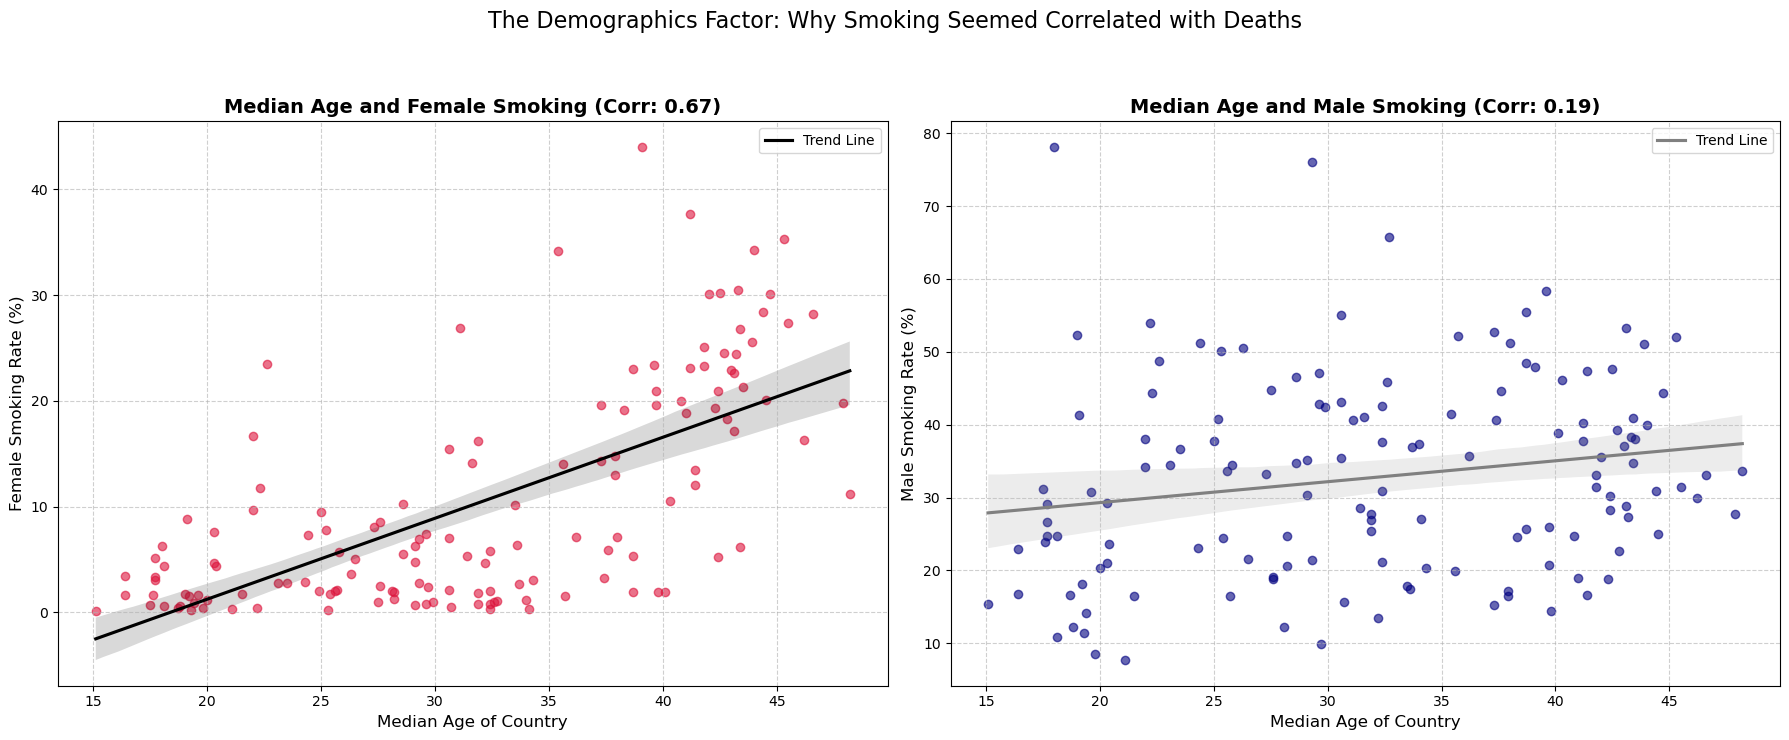

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi hazırla (Her ülkenin son durumu)
df_latest = df.sort_values('date').groupby('location').tail(1)

# Korelasyonu hesapla (Rapora sayısal kanıt eklemek için)
corr_female = df_latest['median_age'].corr(df_latest['female_smokers'])
corr_male = df_latest['median_age'].corr(df_latest['male_smokers'])

# Grafik Çerçevesi
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Grafik 1: YAŞ ve KADIN Sigara Oranı ---
sns.regplot(
    ax=axes[0],
    x='median_age', y='female_smokers', data=df_latest,
    scatter_kws={'alpha': 0.6, 'color': 'crimson', 'label': 'Countries'},
    line_kws={'color': 'black', 'label': 'Trend Line'}
)
axes[0].set_title(f'Median Age and Female Smoking (Corr: {corr_female:.2f})', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Median Age of Country', fontsize=12)
axes[0].set_ylabel('Female Smoking Rate (%)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

# --- Grafik 2: YAŞ ve ERKEK Sigara Oranı ---
sns.regplot(
    ax=axes[1],
    x='median_age', y='male_smokers', data=df_latest,
    scatter_kws={'alpha': 0.6, 'color': 'navy', 'label': 'Countries'},
    line_kws={'color': 'gray', 'label': 'Trend Line'}
)
axes[1].set_title(f'Median Age and Male Smoking (Corr: {corr_male:.2f})', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Median Age of Country', fontsize=12)
axes[1].set_ylabel('Male Smoking Rate (%)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

# Ana Başlık
plt.suptitle('The Demographics Factor: Why Smoking Seemed Correlated with Deaths', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

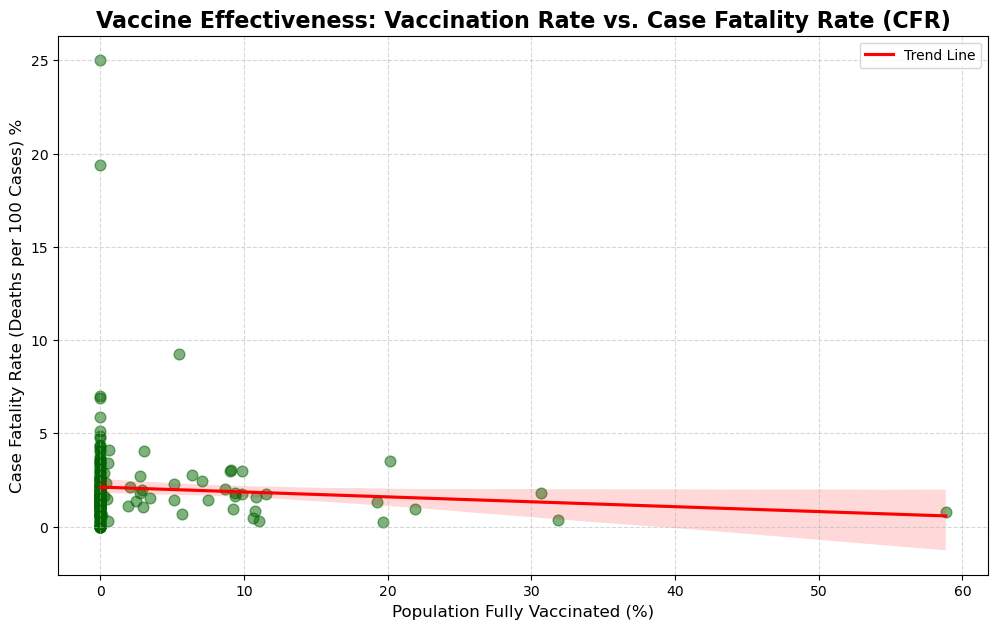

Korelasyon Katsayısı (Aşı vs Ölüm Riski): -0.07


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. En güncel veriyi tekrar hazırlayalım
df_latest = df.sort_values('date').groupby('location').tail(1).copy()

# 2. Case Fatality Rate (CFR) Hesaplayalım
# (Hastalığa yakalananların yüzde kaçı vefat etti?)
df_latest['cfr'] = (df_latest['total_deaths'] / df_latest['total_cases']) * 100

# 3. Grafik Çizimi (Regplot en temizidir)
plt.figure(figsize=(12, 7))

sns.regplot(
    x='vaccination_rate',
    y='cfr',
    data=df_latest,
    scatter_kws={'alpha': 0.5, 'color': 'darkgreen', 's': 60}, # Nokta rengi ve boyutu
    line_kws={'color': 'red', 'label': 'Trend Line'} # Kırmızı trend çizgisi
)

# Başlık ve Etiketler (İngilizce sunum için)
plt.title('Vaccine Effectiveness: Vaccination Rate vs. Case Fatality Rate (CFR)', fontsize=16, fontweight='bold')
plt.xlabel('Population Fully Vaccinated (%)', fontsize=12)
plt.ylabel('Case Fatality Rate (Deaths per 100 Cases) %', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show()

# 4. İstatistiksel Kanıt
corr_vax_death = df_latest['vaccination_rate'].corr(df_latest['cfr'])
print(f"Korelasyon Katsayısı (Aşı vs Ölüm Riski): {corr_vax_death:.2f}")

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hipotez: Aşıların etkisi sadece "Benzer Demografik Yapıdaki" ülkelerde net görülür.
# Filtre: Sadece Medyan Yaşı 35'ten büyük olan (Yaşlı) ülkeleri alalım.
df_old_countries = df_filtered[df_filtered['median_age'] > 35].copy()

plt.figure(figsize=(12, 7))

sns.regplot(
    x='vaccination_rate',
    y='cfr',
    data=df_old_countries,
    scatter_kws={'alpha': 0.6, 'color': 'darkblue', 's': 80},
    line_kws={'color': 'red', 'linewidth': 2, 'label': 'Trend Line'}
)

plt.title('Vaccine Effect in High-Risk (Older) Countries Only', fontsize=16, fontweight='bold')
plt.xlabel('Population Fully Vaccinated (%)', fontsize=12)
plt.ylabel('Case Fatality Rate (CFR) %', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# İsimleri yazdıralım (Sadece dikkat çekenleri)
for line in range(0, df_old_countries.shape[0]):
    row = df_old_countries.iloc[line]
    if row['cfr'] > 3 or row['vaccination_rate'] < 40: # Uç örnekler
        plt.text(row['vaccination_rate']+0.5, row['cfr'], row['location'], size='small')

plt.show()

# Yeni Korelasyonu Görelim
corr_old = df_old_countries['vaccination_rate'].corr(df_old_countries['cfr'])
print(f"Tüm Dünyada Korelasyon: -0.07")
print(f"Sadece Yaşlı Ülkelerde (Risk Grubu) Korelasyon: {corr_old:.2f}")

NameError: name 'df_filtered' is not defined

C:\Users\user\AppData\Local\Temp\ipykernel_13580\740375408.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis_table = df_period.groupby('vax_level')['new_deaths_smoothed_per_million'].mean().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_13580\740375408.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


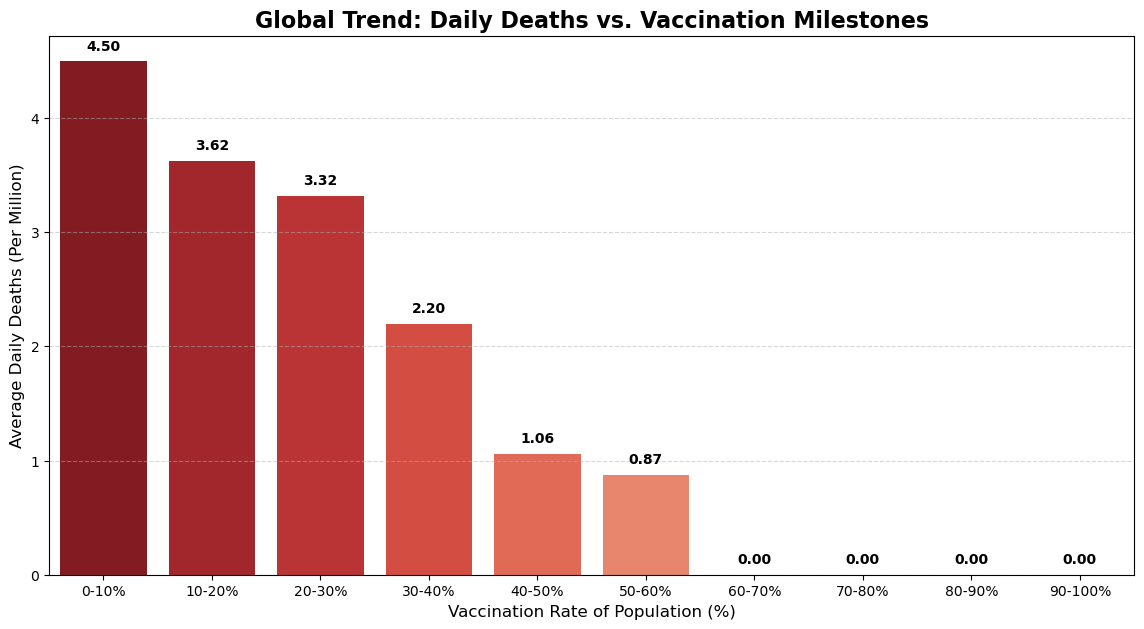

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ÖNCE EKSİK SÜTUNLARI HESAPLAYALIM (Feature Engineering)
# Tam aşılananların nüfusa oranı (Yüzde)
df['people_fully_vaccinated_per_hundred'] = (df['people_fully_vaccinated'] / df['population']) * 100

# Milyon başına günlük ölüm
df['new_deaths_per_million'] = (df['new_deaths'] / df['population']) * 1_000_000

# Günlük ölümlerdeki dalgalanmayı (hafta sonu düşüşlerini) önlemek için 7 günlük ortalama (Smoothing)
# Her ülke için kendi içinde hesaplanmalı:
df['new_deaths_smoothed_per_million'] = df.groupby('location')['new_deaths_per_million'].transform(lambda x: x.rolling(window=7).mean())

# --- ANALİZ KISMI ---

# 2. Sadece Aşı Dönemine (2021 ve sonrası) odaklanalım
df_period = df[df['date'] > '2021-01-01'].copy()

# 3. Veriyi temizle (Hesaplama sonucu oluşan boşlukları at)
df_period = df_period.dropna(subset=['people_fully_vaccinated_per_hundred', 'new_deaths_smoothed_per_million'])

# 4. VERİYİ DİLİMLİYORUZ (Binning)
# Aşılanma oranını %10'luk dilimlere ayırıyoruz
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']

df_period['vax_level'] = pd.cut(df_period['people_fully_vaccinated_per_hundred'], bins=bins, labels=labels)

# 5. Her dilim için ORTALAMA GÜNLÜK ÖLÜM hesaplayalım
analysis_table = df_period.groupby('vax_level')['new_deaths_smoothed_per_million'].mean().reset_index()

# 6. GRAFİK
plt.figure(figsize=(14, 7))

sns.barplot(
    x='vax_level',
    y='new_deaths_smoothed_per_million',
    data=analysis_table,
    palette='Reds_r' # Kırmızıdan beyaza (Tehlike azalıyor)
)

plt.title('Global Trend: Daily Deaths vs. Vaccination Milestones', fontsize=16, fontweight='bold')
plt.xlabel('Vaccination Rate of Population (%)', fontsize=12)
plt.ylabel('Average Daily Deaths (Per Million)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Barların üzerine değerleri yazalım
for index, row in analysis_table.iterrows():
    if pd.notnull(row['new_deaths_smoothed_per_million']):
        plt.text(index, row['new_deaths_smoothed_per_million'] + 0.1, 
                 f"{row['new_deaths_smoothed_per_million']:.2f}", 
                 color='black', ha="center", fontweight='bold')

plt.show()